<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contents-of-Notebook" data-toc-modified-id="Contents-of-Notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Contents of Notebook</a></span><ul class="toc-item"><li><span><a href="#Notebook-magic-commands" data-toc-modified-id="Notebook-magic-commands-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Notebook magic commands</a></span></li><li><span><a href="#Notebook-imports" data-toc-modified-id="Notebook-imports-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Notebook imports</a></span></li><li><span><a href="#Notebook-version-status" data-toc-modified-id="Notebook-version-status-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Notebook version status</a></span></li><li><span><a href="#Customizations-for-notebook" data-toc-modified-id="Customizations-for-notebook-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Customizations for notebook</a></span></li><li><span><a href="#Required-notebooks-to-be-run-first" data-toc-modified-id="Required-notebooks-to-be-run-first-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Required notebooks to be run first</a></span></li></ul></li><li><span><a href="#Examples" data-toc-modified-id="Examples-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Examples</a></span></li></ul></div>

# Geopandas Examples

## Contents of Notebook
geopandas examples, mostly mapping from shapefiles;  looking at Australian PostCode, and Tax Data


### Notebook magic commands

In [1]:
%matplotlib inline


### Notebook imports

In [2]:
# all imports should go here

import pandas as pd
import sys
import os
import subprocess
import datetime
import platform
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import geopandas as gpd
import shapely
from shapely.geometry import Polygon

import numpy as np
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch

### Notebook version status

In [3]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [3]:
theNotebook = '2017-02-25-dc-PostCodeNotebook.ipynb'

In [4]:
# show info to support reproducability

def python_env_name():
    envs = subprocess.check_output('conda env list').splitlines()
    # get unicode version of binary subprocess output
    envu = [x.decode('ascii') for x in envs]
    active_env = list(filter(lambda s: '*' in str(s), envu))[0]
    env_name = str(active_env).split()[0]
    return env_name
#end python_env_name

print('python version : ' + sys.version)
print('python environment :', python_env_name())
print('pandas version : ' + pd.__version__)

print('current wkg dir: ' + os.getcwd())
print('Notebook name: ' + theNotebook)
print('Notebook run at: ' + str(datetime.datetime.now())+ ' local time')
print('Notebook run at: ' + str(datetime.datetime.utcnow()) + ' UTC') 
print('Notebook run on: ' + platform.platform())


python version : 3.6.3 | packaged by conda-forge | (default, Nov  4 2017, 10:10:42) [MSC v.1900 64 bit (AMD64)]
python environment : root36
pandas version : 0.22.0
current wkg dir: C:\Users\donrc\Documents\JupyterNotebooks\GeopandasNotebookProject\develop
Notebook name: 2017-02-25-dc-PostCodeNotebook.ipynb
Notebook run at: 2018-05-14 15:46:19.244725 local time
Notebook run at: 2018-05-14 05:46:19.244725 UTC
Notebook run on: Windows-10-10.0.16299-SP0


### Customizations for notebook

In [5]:
# path to saved figures
FIGURE_PREFIX = '../figures/'

### Required notebooks to be run first

In [6]:
pass

## Examples

These are taken from the geopandas documentation

Read example data sets that seem to be shapefiles sets

In [7]:
postcode_df = gpd.read_file('../data/shapefiles/POA_2011_AUST.shp')

In [8]:
postcode_df.head()

,POA_CODE,POA_NAME,SQKM,geometry
0,0800,0800,3.123064,"POLYGON ((130.833947232 -12.4574101095, 130.83..."
1,0810,0810,24.428581,"POLYGON ((130.845843232 -12.4026033785, 130.84..."
2,0812,0812,35.889912,"POLYGON ((130.878288352 -12.395288423, 130.883..."
3,0820,0820,39.051721,"POLYGON ((130.843277504 -12.4074301765, 130.84..."
4,0822,0822,144468.865099,"(POLYGON ((132.413647552 -11.237914992, 132.41..."


Filter out rows with no geometry (==None)

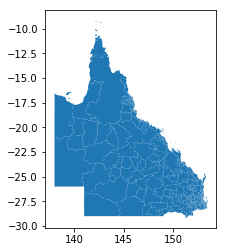

In [9]:
postcode_df[postcode_df['POA_NAME'].str[0]=='4'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000253CB4B1CC0>]],
      dtype=object)

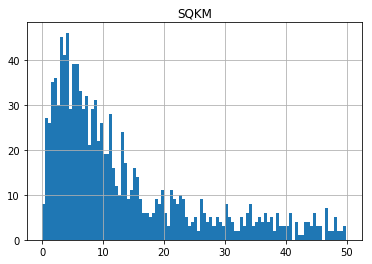

In [11]:
postcode_df[postcode_df['SQKM']<50].hist(column='SQKM', bins=100)



Filter out rows with no geometry (==None)

In [10]:
badpc = postcode_df[postcode_df['geometry'].isnull()]

In [13]:
badpc.head()


,POA_CODE,POA_NAME,SQKM,geometry
2513,9191,Unclassified (Aust.),0.0,None
2514,9494,No usual address (Aust.),NaN,None
2515,9797,Migratory - Offshore - Shipping (Aust.),NaN,None


In [16]:
world = gpd.read_file('../data/shapefiles/ne_10m_admin_0_countries.shp')

In [17]:
goodpc = postcode_df[postcode_df['geometry'].notnull()].copy(deep=True)

In [18]:
goodpc.size

10052

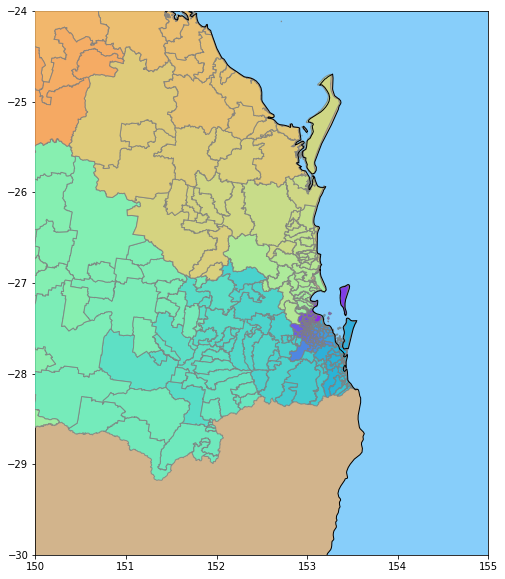

In [34]:
fig, ax = plt.subplots(figsize=(14,10) )

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

# define our default colors
water = 'lightskyblue'
earth = 'tan'


# set limits of plot to SE QLD
ax.set_xlim([150, 155])
ax.set_ylim([-30, -24])

# make water the default color
ax.set_facecolor(water)

# just get the GeoSeries of the world - maybe faster to plot?
world_gs = world['geometry']

# use geopandas to filter out all but postcodes starting with 4
qld_pc = postcode_df[postcode_df['POA_NAME'].str[0]=='4']

# plot the areas NOT covered by postcodes (ie Not QLD)
world_gs.plot(ax = ax, linewidth=1,  facecolor=earth, alpha=1 )

# plot the postcodes of Qld, each a different color
qld_pc.plot(ax = ax, linewidth=1, zorder=4, alpha=0.8, cmap='rainbow', edgecolor='gray')

# plot the coastlines
world_gs.plot(ax = ax, linewidth=1,  facecolor='none', alpha=1, zorder=5 )

In [19]:
atodf=pd.read_excel('../data/taxstats2014individual08taxableincomebypostcode.xlsx', sheet_name='Table 8',\
                    skiprows=2)

In [20]:
atodf.head()


,State/ Territory,Postcode2,Individuals 2003–04 no.,Median3 taxable income 2003–04 $,Mean3 taxable income 2003–04 $,Individuals 2013–14 no.,Median3 taxable income 2013–14 $,Mean3 taxable income 2013–14 $,Median growth %,Mean growth %
0,ACT,2600,5692,42327,55819,5712,66815,94265,58,69
1,ACT,2601,1833,35584,47294,2777,46880,66876,32,41
2,ACT,2602,17431,35997,41004,19072,57584,68424,60,67
3,ACT,2603,5973,45229,62762,6210,70655,116150,56,85
4,ACT,2604,6053,41732,49505,7205,67865,81898,63,65


In [21]:
len(atodf['Postcode2'].unique())

2203

In [22]:
len(goodpc['POA_CODE'].unique())

2513

In [23]:
atodf['Postcode2'][0]

2600

In [24]:
goodpc['POA_CODE'][0]

'0800'

In [25]:
goodpc['POA_CODE'] = goodpc['POA_CODE'].astype(int)

In [26]:
goodpc['POA_CODE'][0]

800

In [27]:
set1 = set(atodf['Postcode2'].unique())
set2 = set(goodpc['POA_CODE'].unique())

diff1 =  set1.difference(set2)
diff2 = set2.difference(set1)



In [28]:
print(' In ato, but not abs', diff1)

 In ato, but not abs {801, 804, 871, 811, 2379, 814, 881, 3665, 851, 821, 861, 831}


In [29]:
print(' in abs, but not ato', diff2)

 in abs, but not ato {3586, 2563, 2052, 3588, 3589, 3591, 4611, 4612, 5642, 7176, 3596, 4620, 3086, 7178, 7180, 6161, 5138, 5139, 5650, 4117, 5654, 6165, 7183, 2585, 7186, 3617, 6180, 6181, 6182, 5160, 7211, 7213, 6705, 2109, 6209, 6211, 4676, 2629, 6221, 3663, 2129, 6229, 4694, 5720, 2649, 7257, 2139, 5724, 7261, 6240, 7265, 4707, 5732, 2661, 5221, 5734, 4712, 6758, 6760, 6251, 6762, 3694, 6256, 5236, 5237, 2678, 4727, 4728, 3705, 4731, 3709, 4733, 3715, 4739, 4229, 3727, 5263, 3217, 3733, 4757, 5269, 3739, 5279, 2721, 3235, 3236, 2725, 2726, 3237, 3238, 3751, 6309, 3243, 3755, 6313, 6316, 2735, 6445, 6322, 6447, 3254, 5303, 6327, 6448, 5308, 5309, 5311, 4801, 3778, 3267, 6341, 3270, 6343, 7163, 3273, 3274, 3275, 3785, 3789, 3278, 5321, 6352, 2769, 5331, 6358, 3800, 3292, 4828, 6368, 5346, 6373, 5350, 2791, 2792, 3303, 5354, 3309, 3310, 5357, 6386, 2803, 3317, 2807, 2808, 2809, 3832, 3833, 4345, 4857, 6393, 6394, 6397, 3329, 3330, 4353, 2308, 6403, 6405, 2314, 3852, 4364, 4365, 6413, 

In [30]:
mask = atodf['Postcode2'].isin(list(diff1))
goodato_df = atodf[~mask].copy(deep=True)

In [31]:
set1 = set(goodato_df['Postcode2'].unique())
set2 = set(goodpc['POA_CODE'].unique())

diff1 =  set1.difference(set2)
diff2 = set2.difference(set1)

print(' In ato, but not abs', diff1)

 In ato, but not abs set()


In [34]:
#result = pd.merge(goodato_df, right, how='left', on=['key1', 'key2'])

In [32]:
goodato_df.head(1)

,State/ Territory,Postcode2,Individuals 2003–04 no.,Median3 taxable income 2003–04 $,Mean3 taxable income 2003–04 $,Individuals 2013–14 no.,Median3 taxable income 2013–14 $,Mean3 taxable income 2013–14 $,Median growth %,Mean growth %
0,ACT,2600,5692,42327,55819,5712,66815,94265,58,69


In [33]:
goodpc.head(1)


,POA_CODE,POA_NAME,SQKM,geometry
0,800,0800,3.123064,"POLYGON ((130.833947232 -12.4574101095, 130.83..."


In [34]:
goodato_df.rename(columns={'Postcode2':'POA_CODE'}, inplace=True)

In [35]:
goodato_df.head(1)

,State/ Territory,POA_CODE,Individuals 2003–04 no.,Median3 taxable income 2003–04 $,Mean3 taxable income 2003–04 $,Individuals 2013–14 no.,Median3 taxable income 2013–14 $,Mean3 taxable income 2013–14 $,Median growth %,Mean growth %
0,ACT,2600,5692,42327,55819,5712,66815,94265,58,69


In [36]:
goodpc.head(1)

,POA_CODE,POA_NAME,SQKM,geometry
0,800,0800,3.123064,"POLYGON ((130.833947232 -12.4574101095, 130.83..."


In [37]:
result = pd.merge(goodato_df, goodpc, how='left', on=['POA_CODE'])

In [38]:
result.head(3)

,State/ Territory,POA_CODE,Individuals 2003–04 no.,Median3 taxable income 2003–04 $,Mean3 taxable income 2003–04 $,Individuals 2013–14 no.,Median3 taxable income 2013–14 $,Mean3 taxable income 2013–14 $,Median growth %,Mean growth %,POA_NAME,SQKM,geometry
0,ACT,2600,5692,42327,55819,5712,66815,94265,58,69,2600,21.478754,"(POLYGON ((149.072755264 -35.30362082600001, 1..."
1,ACT,2601,1833,35584,47294,2777,46880,66876,32,41,2601,3.884096,"POLYGON ((149.10970608 -35.266543015, 149.1097..."
2,ACT,2602,17431,35997,41004,19072,57584,68424,60,67,2602,22.782861,"POLYGON ((149.111588896 -35.266024978, 149.111..."


In [39]:
a = result[result['geometry'].isnull()]

In [40]:
result.columns.values

array(['State/\nTerritory', 'POA_CODE', 'Individuals 2003–04\nno.',
       'Median3 taxable income 2003–04\n$',
       'Mean3 taxable income 2003–04\n$', 'Individuals 2013–14\nno.',
       'Median3 taxable income 2013–14\n$',
       'Mean3 taxable income 2013–14\n$', 'Median growth\n%',
       'Mean growth\n%', 'POA_NAME', 'SQKM', 'geometry'], dtype=object)

In [41]:
new_cols = [s.replace('\n','') for s in result.columns.values]

In [42]:
new_cols

['State/Territory',
 'POA_CODE',
 'Individuals 2003–04no.',
 'Median3 taxable income 2003–04$',
 'Mean3 taxable income 2003–04$',
 'Individuals 2013–14no.',
 'Median3 taxable income 2013–14$',
 'Mean3 taxable income 2013–14$',
 'Median growth%',
 'Mean growth%',
 'POA_NAME',
 'SQKM',
 'geometry']

In [43]:
result.columns = new_cols

In [44]:
result.columns.values

array(['State/Territory', 'POA_CODE', 'Individuals 2003–04no.',
       'Median3 taxable income 2003–04$', 'Mean3 taxable income 2003–04$',
       'Individuals 2013–14no.', 'Median3 taxable income 2013–14$',
       'Mean3 taxable income 2013–14$', 'Median growth%', 'Mean growth%',
       'POA_NAME', 'SQKM', 'geometry'], dtype=object)

In [45]:
result.columns.values

array(['State/Territory', 'POA_CODE', 'Individuals 2003–04no.',
       'Median3 taxable income 2003–04$', 'Mean3 taxable income 2003–04$',
       'Individuals 2013–14no.', 'Median3 taxable income 2013–14$',
       'Mean3 taxable income 2013–14$', 'Median growth%', 'Mean growth%',
       'POA_NAME', 'SQKM', 'geometry'], dtype=object)

In [46]:
r2 = gpd.GeoDataFrame(result)

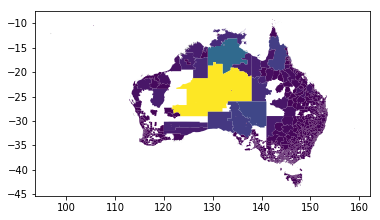

In [47]:
r2.plot(column='SQKM', linewidth=0)

Text(0.5,1,'QLD Postcodes and Median Taxable Income')

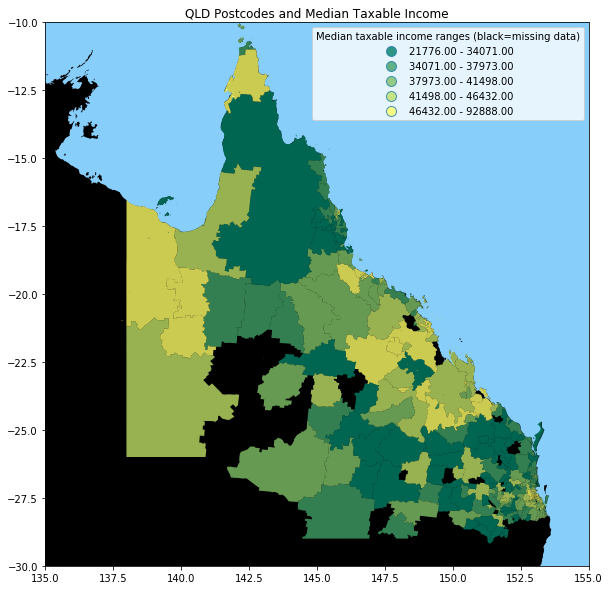

In [51]:
fig, ax = plt.subplots(figsize=(14,10) )

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

# define our default colors
water = 'lightskyblue'
earth = 'tan'


# set limits of plot to  QLD
ax.set_xlim([135, 155])
ax.set_ylim([-30, -10])

# make water the default color
ax.set_facecolor(water)

# just get the GeoSeries of the world - maybe faster to plot?
world_gs = world[world['ADMIN']=='Australia']['geometry']

# use geopandas to filter out all but postcodes starting with 4
qld_pc = r2[r2['POA_NAME'].str[0]=='4']

world_gs.plot(ax = ax, linewidth=1,  facecolor='black', alpha=1 )
qld_pc.plot(ax = ax, linewidth=0, zorder=4, alpha=0.8, cmap='summer', column='Median3 taxable income 2013–14$', \
            scheme='quantiles', k= 5, legend=True)

leg = ax.get_legend()
leg.set_bbox_to_anchor((0.8, 0.8, 0.2, 0.2))
leg.set_title('Median taxable income ranges (black=missing data)', )

ax.set_title('QLD Postcodes and Median Taxable Income')

In [78]:
goodpc[goodpc['POA_CODE']==4573]

,POA_CODE,POA_NAME,SQKM,geometry
1600,4573,4573,44.060311,"POLYGON ((153.10317744 -26.436804481, 153.1031..."


In [80]:
goodato_df[goodato_df['POA_CODE']==4573]

,State/ Territory,POA_CODE,Individuals 2003–04 no.,Median3 taxable income 2003–04 $,Mean3 taxable income 2003–04 $,Individuals 2013–14 no.,Median3 taxable income 2013–14 $,Mean3 taxable income 2013–14 $,Median growth %,Mean growth %
877,QLD,4573,10441,23638,28486,14079,37953,50820,61,78


In [81]:
r2[r2['POA_CODE']==4573]

,State/Territory,POA_CODE,Individuals 2003–04no.,Median3 taxable income 2003–04$,Mean3 taxable income 2003–04$,Individuals 2013–14no.,Median3 taxable income 2013–14$,Mean3 taxable income 2013–14$,Median growth%,Mean growth%,POA_NAME,SQKM,geometry
866,QLD,4573,10441,23638,28486,14079,37953,50820,61,78,4573,44.060311,"POLYGON ((153.10317744 -26.436804481, 153.1031..."


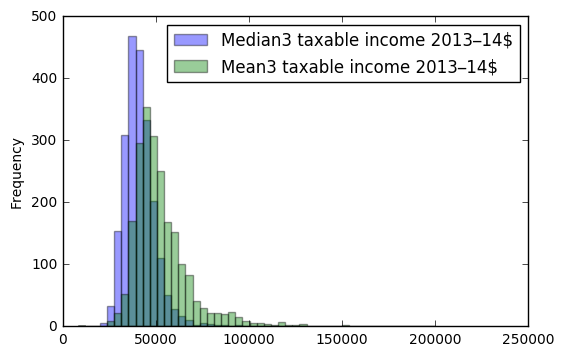

In [98]:
r2[['Median3 taxable income 2013–14$','Mean3 taxable income 2013–14$'] ].plot(kind='hist', bins=50, stacked=False, alpha=0.4)

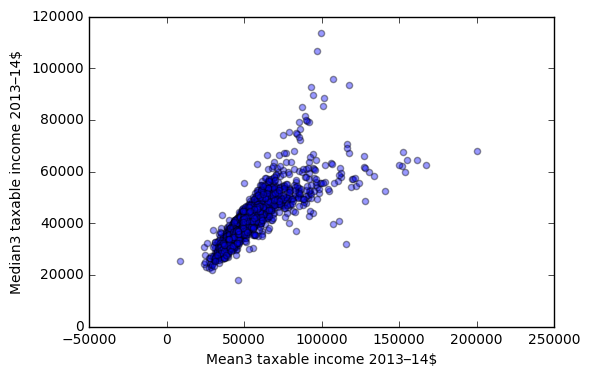

In [105]:
r2[['Median3 taxable income 2013–14$','Mean3 taxable income 2013–14$'] ].plot( kind='scatter', x='Mean3 taxable income 2013–14$',\
                     y='Median3 taxable income 2013–14$',      alpha=0.4)

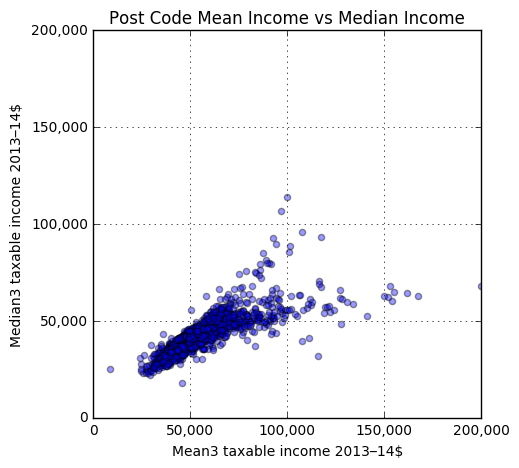

In [119]:
import matplotlib.ticker as tkr

fig, ax = plt.subplots(figsize=(7,5) )

# set limits of plot t
ax.set_xlim([0, 200000])
ax.set_ylim([0, 200000])

ax.set_aspect('equal')

ax.grid(True)

ax.get_xaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(
    tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

r2[['Median3 taxable income 2013–14$','Mean3 taxable income 2013–14$'] ].plot( kind='scatter', x='Mean3 taxable income 2013–14$',\
                     y='Median3 taxable income 2013–14$',      alpha=0.4, ax=ax, grid=True)

ax.set_title('Post Code Mean Income vs Median Income')
plt.show()


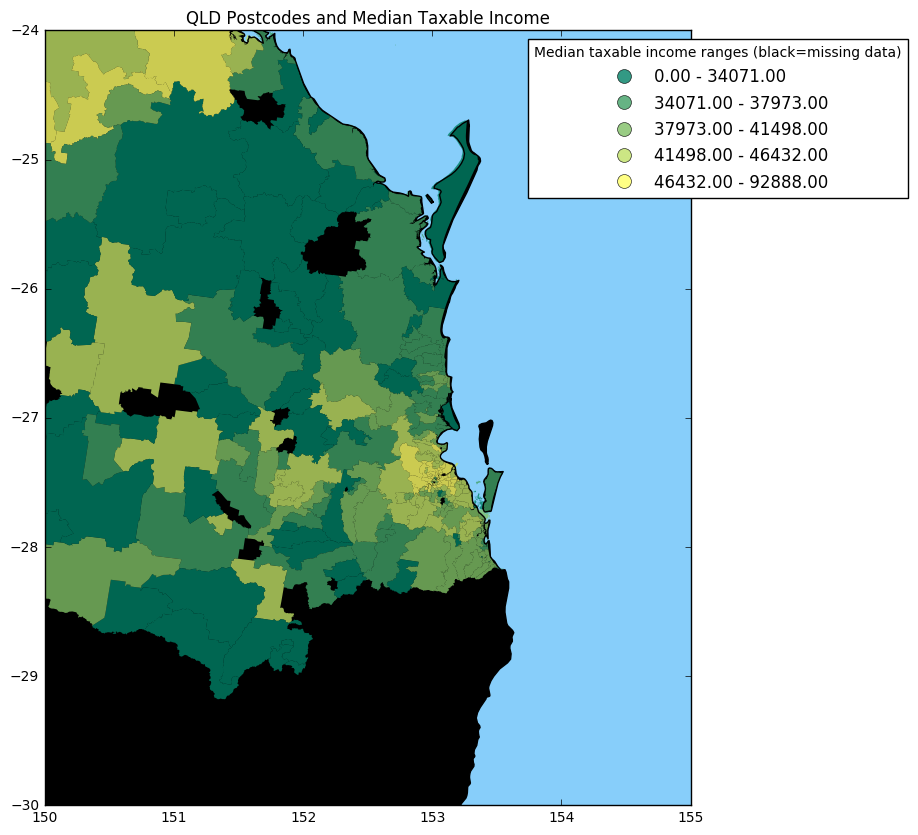

In [122]:
fig, ax = plt.subplots(figsize=(14,10) )

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

# define our default colors
water = 'lightskyblue'
earth = 'tan'


# set limits of plot to SE QLD
ax.set_xlim([150, 155])
ax.set_ylim([-30, -24])

# make water the default color
ax.set_axis_bgcolor(water)

# just get the GeoSeries of the world - maybe faster to plot?
world_gs = world[world['ADMIN']=='Australia']['geometry']

# use geopandas to filter out all but postcodes starting with 4
qld_pc = r2[r2['POA_NAME'].str[0]=='4']

world_gs.plot(ax = ax, linewidth=1,  facecolor='black', alpha=1 )
qld_pc.plot(ax = ax, linewidth=0, zorder=4, alpha=0.8, cmap='summer', column='Median3 taxable income 2013–14$', \
            scheme='quantiles', k= 5, legend=True)

leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15, 0.8, 0.2, 0.2))
leg.set_title('Median taxable income ranges (black=missing data)', )

ax.set_title('QLD Postcodes and Median Taxable Income')

In [121]:
world.head()

,ABBREV,ABBREV_LEN,ADM0_A3,ADM0_A3_IS,ADM0_A3_UN,ADM0_A3_US,ADM0_A3_WB,ADM0_DIF,ADMIN,BRK_A3,...,UN_A3,WB_A2,WB_A3,WIKIPEDIA,WOE_ID,WOE_ID_EH,WOE_NOTE,featurecla,geometry,scalerank
0,Aruba,5.0,ABW,ABW,-99.0,ABW,-99.0,1.0,Aruba,ABW,...,533,AW,ABW,-99.0,23424736.0,23424736.0,Exact WOE match as country,Admin-0 country,POLYGON ((-69.99693762899992 12.57758209800004...,3
1,Afg.,4.0,AFG,AFG,-99.0,AFG,-99.0,0.0,Afghanistan,AFG,...,004,AF,AFG,-99.0,23424739.0,23424739.0,Exact WOE match as country,Admin-0 country,"POLYGON ((71.04980228700009 38.40866445000009,...",0
2,Ang.,4.0,AGO,AGO,-99.0,AGO,-99.0,0.0,Angola,AGO,...,024,AO,AGO,-99.0,23424745.0,23424745.0,Exact WOE match as country,Admin-0 country,(POLYGON ((11.73751945100014 -16.6925779829998...,0
3,Ang.,4.0,AIA,AIA,-99.0,AIA,-99.0,1.0,Anguilla,AIA,...,660,-99,-99,-99.0,23424751.0,23424751.0,Exact WOE match as country,Admin-0 country,(POLYGON ((-63.03766842399995 18.2129580750000...,3
4,Alb.,4.0,ALB,ALB,-99.0,ALB,-99.0,0.0,Albania,ALB,...,008,AL,ALB,-99.0,23424742.0,23424742.0,Exact WOE match as country,Admin-0 country,"POLYGON ((19.74776574700007 42.57890085900007,...",0
